# Install Librairies

In [1]:
!pip install scikit-learn-extra
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.5 MB/s eta 0:00:00


# Import Librairies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn_extra.cluster import KMedoids

from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Load data

In [3]:
DATADIR = '../input/tabular-playground-series-jul-2022/data.csv'
RM_FEATURES = True

In [4]:
df = pd.read_csv(DATADIR, index_col='id')
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
df.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


# Data pre-processing
## Scaling
- **StandardScaler**: Scales each column independently to have mean 0 and standard deviation 1, by subtracting by the column *mean* and dividing by the column *standard deviation*.
- **RobustScaler**: Does the same as above but uses statistics that are robust to outliers, i.e. it subtracts by the median and divides by the interquartile range.
- **PowerTransformer**: Makes columns more gaussian like by stabilising variance and minising skew.

In [6]:
scaled_features = PowerTransformer().fit_transform(df.values)
df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [7]:
df.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,...,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04
mean,8.990541e-18,-1.218073e-17,3.915235e-18,1.348581e-17,4.567775e-18,2.305639e-17,-1.044063e-17,2.742115e-16,3.074185e-16,2.240385e-16,...,-8.338001e-18,-1.964868e-17,-1.935866e-17,5.800349e-19,-3.364202e-17,-9.933097e-18,8.845532e-18,1.276077e-17,1.464588e-17,2.175131e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.725789e+00,-4.213798e+00,-4.341712e+00,-4.030537e+00,-4.515072e+00,-4.291662e+00,-4.937801e+00,-2.070579e+00,-2.117927e+00,-2.272516e+00,...,-4.846921e+00,-4.731373e+00,-4.403534e+00,-4.757347e+00,-5.344240e+00,-5.227565e+00,-4.322237e+00,-5.176218e+00,-5.973419e+00,-4.646507e+00
25%,-6.743761e-01,-6.757248e-01,-6.719176e-01,-6.705926e-01,-6.770434e-01,-6.733050e-01,-6.781042e-01,-5.981226e-01,-5.750189e-01,-6.351572e-01,...,-6.720297e-01,-6.768122e-01,-6.749678e-01,-6.615408e-01,-6.582059e-01,-6.913232e-01,-6.687566e-01,-6.377111e-01,-6.403068e-01,-6.672694e-01
50%,1.196700e-03,1.811562e-03,-1.610195e-03,-4.001730e-04,-5.722443e-05,2.193779e-03,3.247989e-03,2.171834e-02,-4.885615e-02,1.398752e-02,...,2.413138e-03,6.863349e-04,-2.597625e-04,-1.811785e-03,-4.719308e-04,4.909952e-03,-5.305024e-03,-2.157539e-03,1.949197e-03,-5.393793e-03
75%,6.743506e-01,6.720180e-01,6.761390e-01,6.734950e-01,6.789115e-01,6.743964e-01,6.739472e-01,7.568995e-01,6.221334e-01,6.532052e-01,...,6.730265e-01,6.744150e-01,6.775084e-01,6.606887e-01,6.581571e-01,6.829543e-01,6.756703e-01,6.361445e-01,6.406078e-01,6.669561e-01
max,4.471742e+00,4.307363e+00,4.585788e+00,4.372601e+00,4.044618e+00,4.715575e+00,3.988256e+00,4.167411e+00,3.829444e+00,3.375941e+00,...,4.564552e+00,4.374950e+00,4.169190e+00,4.317352e+00,4.210245e+00,4.713935e+00,4.610223e+00,4.896985e+00,5.214177e+00,4.443318e+00


# PCA (**P**rincipal **C**omponent **A**nalysis)

In [8]:
n_v = 0.99
pca = PCA(n_components=n_v) # keep n_v variance
pca_components = pca.fit_transform(df)

print('NB components', pca_components.shape[1], 'for', n_v * 100, '% variance instead of', len(df.columns), 'components')

NB components 29 for 99.0 % variance instead of 29 components


# Bayesian Gaussian Mixture

In [9]:
# def components_number_multiple(max_n, n_seeds):
#     bic_scores = []
#     for n in range(4, max_n):
#         bic_scores_n = []
#         for seed in range(n_seeds):
#             bgmm = BayesianGaussianMixture(n_components=n, covariance_type='full', max_iter=100, n_init=5, random_state=1).fit(components) 
#             bic_scores_n.append(bgmm.bic(components))
#         bic_scores.append(bic_scores_n)
#     return bic_scores

# def plot_components_number_multiple(max_n, n_seeds):
#     bic_scores = components_number_multiple(max_n + 1, n_seeds)
#     bic_df = pd.DataFrame(data = bic_scores).T
#     bic_df.columns = range(2,max_n+1)
    
#     f,ax = plt.subplots(figsize=(20,7))
#     for i in range(n_seeds):
#         sns.lineplot(x=bic_df.columns, y=bic_df.loc[i].values)
#     ax.set_xticks(range(2,max_n+1))
    
#     return bic_df

# a = plot_components_number_multiple(max_n = 12, n_seeds = 22)

In [10]:
if RM_FEATURES:
    drop_features = [f'f_0{i}' for i in range(7)]
    drop_features = drop_features + [f'f_{i}' for i in range(14,22)]
    df = df.drop(drop_features, axis=1)

In [11]:
df.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


In [12]:
components = df.values

In [13]:
model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=600, n_init=10, random_state=1).fit(components)
preds_bgmm = model_bgmm.predict(components)

Text(0.5, 1.0, 'Predicted clusters')

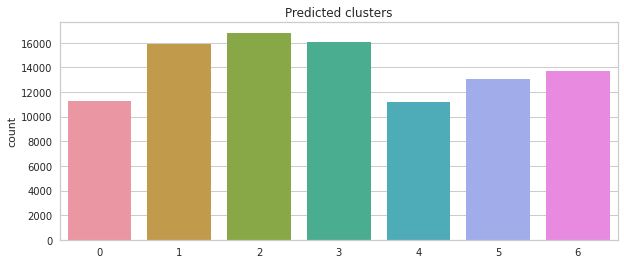

In [14]:
# Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=preds_bgmm)
plt.title('Predicted clusters')

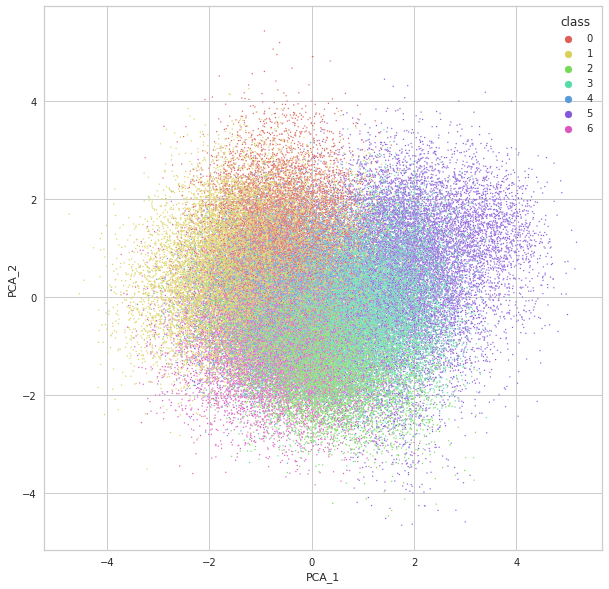

In [15]:
pca = PCA(random_state = 10)
X_pca = pca.fit_transform(components)
PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})   
PCA_df["class"] = preds_bgmm
    
f,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", hue="class", s=2, palette=sns.color_palette("hls", PCA_df["class"].nunique()));

# Semi-supervised Bayesian Gaussian Mixture

In [16]:
preds_bgmm_sm = model_bgmm.predict_proba(components)

In [17]:
preds_bgmm_sm.shape

(98000, 7)

In [18]:
df_proba = pd.DataFrame(preds_bgmm_sm, columns = [i for i in range(7)])

df_proba['max_proba'] = df_proba.max(axis=1)
df_proba['max_idx_proba'] = df_proba.idxmax(axis=1)

In [19]:
df_components = pd.DataFrame(components, columns = [f'f_{i}' for i in range(14)])

In [20]:
df_join = df_proba.join(df_components)

In [21]:
df_train_test = df_join[df_join['max_proba'] > 0.95]
X = df_train_test[[f'f_{i}' for i in range(14)]]
y = df_train_test['max_idx_proba']

In [22]:
# from sklearn.naive_bayes import GaussianNB

# clf_pf = GaussianNB()
# clf_pf.fit(X, y)

In [23]:
# from sklearn.ensemble import RandomForestClassifier

# clf_pf = RandomForestClassifier(max_depth=100, random_state=22)
# clf_pf.fit(X, y)

In [24]:
from sklearn.neural_network import MLPClassifier

clf_pf = MLPClassifier(random_state=13, max_iter=500)
clf_pf.fit(X, y)

MLPClassifier(max_iter=500, random_state=13)

In [25]:
# from sklearn.naive_bayes import BernoulliNB

# clf_pf = BernoulliNB()
# clf_pf.fit(X, y)

In [26]:
preds_bgmm_sm = clf_pf.predict(components)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
preds_bgmm_sm_proba = clf_pf.predict_proba(components)
preds_bgmm_sm_proba = np.amax(preds_bgmm_sm_proba, axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
df_join['max_sm'] = preds_bgmm_sm
df_join['max_proba_sm'] = preds_bgmm_sm_proba

In [29]:
df_join.tail()

,0,1,2,3,4,5,6,max_proba,max_idx_proba,f_0,...,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,max_sm,max_proba_sm
97995,0.002846,0.223951,0.093007,1.800902e-01,0.484719,1.226063e-03,0.014161,0.484719,4,0.021718,...,0.317221,0.952876,0.407860,1.283842,-0.075219,-0.989846,0.166988,0.459507,3,0.645411
97996,0.008706,0.540853,0.416230,1.792701e-05,0.033491,1.240040e-08,0.000702,0.540853,1,-0.598123,...,1.295599,1.158978,-0.429211,0.271421,0.783851,0.141914,0.692651,0.639735,1,0.992099
97997,0.001039,0.000311,0.033668,9.503894e-01,0.008268,9.153139e-05,0.006233,0.950389,3,0.756900,...,-0.735370,-0.995900,1.450009,0.867108,0.180931,1.539188,1.178636,0.584929,3,0.999941
97998,0.698511,0.037989,0.000428,1.377207e-01,0.084227,4.058475e-02,0.000539,0.698511,0,-1.440987,...,-0.162832,0.278189,0.512721,0.687465,-0.286145,-1.085469,-0.538491,0.129094,0,0.543663
97999,0.051667,0.812515,0.000011,3.919345e-09,0.000930,6.430146e-08,0.134876,0.812515,1,-2.070579,...,-0.162832,-1.659267,1.119965,-1.202350,0.139758,-0.634344,0.999328,-0.296914,1,0.877948


In [30]:
preds_sm = []
for index, row in df_join.iterrows():
    if row['max_proba_sm'] > row['max_proba']:
        preds_sm.append(row['max_sm'])
    else:
        preds_sm.append(row['max_idx_proba'])
        
preds_sm = np.array(preds_sm)

Text(0.5, 1.0, 'Predicted clusters')

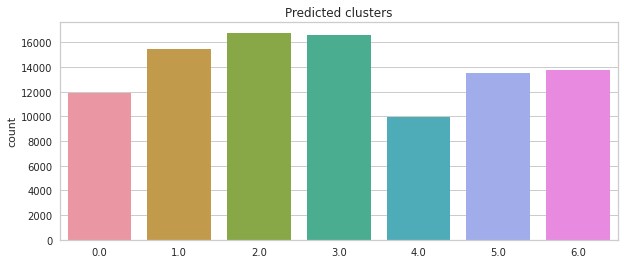

In [31]:
# Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=preds_sm)
plt.title('Predicted clusters')

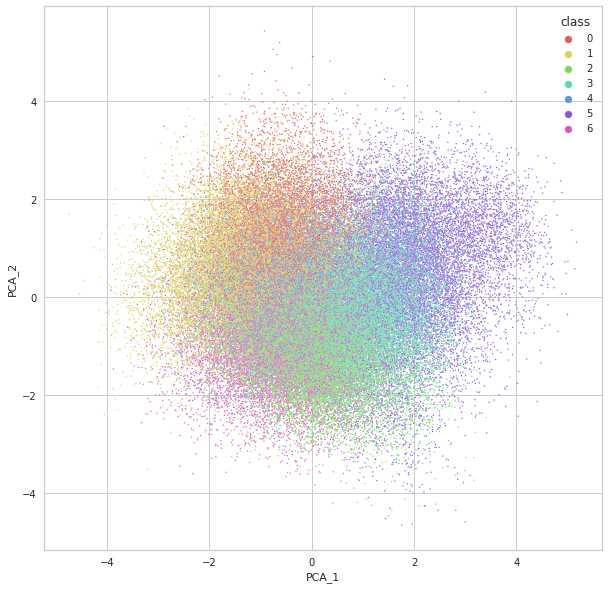

In [32]:
pca = PCA(random_state = 10)
X_pca = pca.fit_transform(components)
PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})   
PCA_df["class"] = preds_bgmm_sm
    
f,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", hue="class", s=2, palette=sns.color_palette("hls", PCA_df["class"].nunique()));

# KMeans
KMeans is popular because it is a **reliable** and **fast algorithm**. The main downside is that it assumes the clusters are **spherical**, which is not always the case.

Elbow Method to determine the number of clusters to be formed:


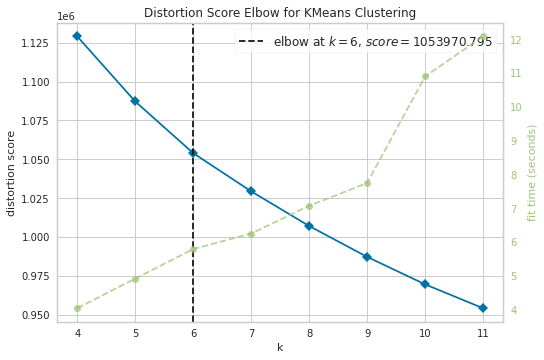

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow_m = KElbowVisualizer(KMeans(random_state=22), k=(4,12))
elbow_m.fit(components)
elbow_m.show()

In [34]:
model = KMeans(n_clusters=7).fit(components)
preds_kmeans = model.predict(components)

In [35]:
preds_kmeans.shape

(98000,)

Text(0.5, 1.0, 'Predicted clusters')

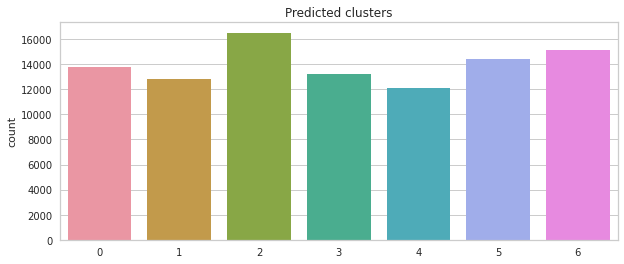

In [36]:
# Countplot
plt.figure(figsize=(10,4))
sns.countplot(x=preds_kmeans)
plt.title('Predicted clusters')

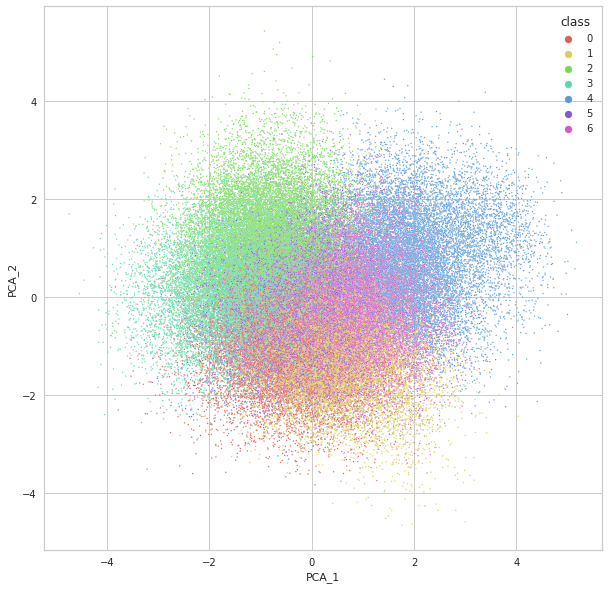

In [37]:
pca = PCA(random_state = 10)
X_pca = pca.fit_transform(components)
PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})   
PCA_df["class"] = preds_kmeans
    
f,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", hue="class", s=2, palette=sns.color_palette("hls", PCA_df["class"].nunique()));

# Submission

In [38]:
submission = pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")

In [39]:
submission["Predicted"] = preds_sm
submission

,Id,Predicted
0,0,6.0
1,1,4.0
2,2,6.0
3,3,5.0
4,4,2.0
...,...,...
97995,97995,3.0
97996,97996,1.0
97997,97997,3.0
97998,97998,0.0


In [40]:
submission.to_csv('/kaggle/working/submission.csv', index=False)